<span style="font-size: 14pt">ФИВТ, АПТ, Курс по машинному обучению, Весна 2017, семинар 9 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko, </span>
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

# Linear models (Линейные модели)
<h3> Plan </h3>

* **Linear Regression** 
 - Linear Model for Regression (preview)
 - Regularization: Ridge Regression, LASSO
 - 

* **Log-Legression**
 - log-loss
 - learning log-regression
 - tasks
 
* **Reminder**
 - Metrics Precision Recall
 - Metrics ROC-AUC
 - HW4

In [29]:
import os
import numpy as np
import seaborn as sns
import cPickle as pickle

from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

%matplotlib inline
sns.set_context("notebook", font_scale=1.5)
import random
from IPython.display import Image, SVG
from scipy import optimize

<h1 align="center"> Linear Regression </h1>
** Вопросы **
* Как настриваются веса в LR?
* Какие проблемы возникают при обучении LR? С чем связано переобучение LR?
* Что такое гребневая регрессия и Лассо Тибширани?

## For Regression

## $$Y = \mathbf{R},~X\in \mathbf{R}^d$$
## $$y_{predict}(x) = <w, x> $$ 
## $$Q(w, X^\ell) = \frac{1}{n} \sum_i^n L(y_i, <w,x_i>) \rightarrow \min_w$$

### Linear Regression (Equation)

## $$ g(x, \alpha) = \sum_{i}^{n} \alpha_i f_i(x) $$
## $$ Q(\alpha) = \| F\alpha - y \|^2 $$

Normal Equation

## $$ \alpha^{*} = (F^{T}F)^{-1}F^{T}y = F^{+}y $$
## $$ Q(\alpha^{*}) = \| P_{F}y - y \|^2 $$
## $$ P_{F} = FF^{+} $$

## Регуляризация

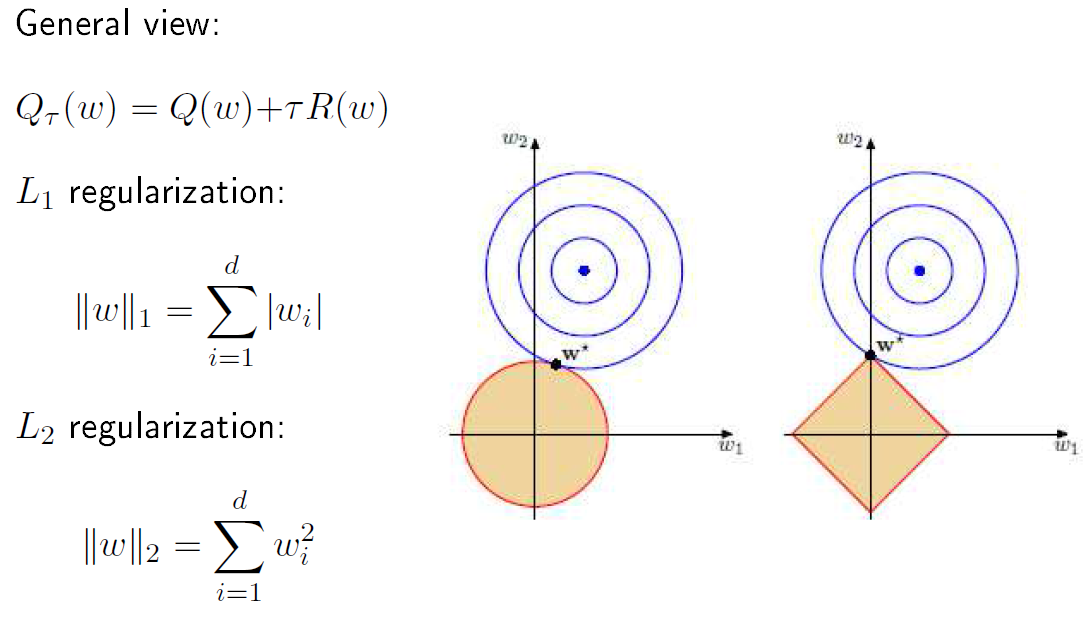

In [37]:
Image('pic/Regularization.png')

### Regularization for LR:

## $$ Q_{\tau}(\alpha) = \| F\alpha - y\|^2 + \tau \| \alpha \|^2 $$

vs

## $$ \sum_{i=1}^{n} |\alpha_i| \leq C $$

Student Question: Whatr Esle?

See <a href='http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf'> К.В. Воронцов, Методы машинного обучения по прецедентам </a>
* глава 5.3 Линейная регрессия

---------
<h1 align="center">Log-Regression</h1> 

** Вопросы **
* Какую задачу решает логистическая регрессия?
* Что log-loss?
* как поставить оптимизационную задачу можно поставить и через log loss?
* как оценить вероятность P(1|x)?


See <a href='http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf'> К.В. Воронцов, Методы машинного обучения по прецедентам </a>
* глава 4.4 Логистическая регрессия

-------
<h1 align="center">Reminder</h1> 
## Metrics

** Вопросы **
* Какую использовать метрику точности предсказаний при несбалансированных классах?

In [59]:
# Используются данные из https://archive.ics.uci.edu/ml/datasets/Adult
df = pd.read_csv('./adult/adult.data.txt', header=None)
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')
df.columns = columns.split()

In [60]:
df.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Какое соотношение классов?

In [61]:
df.groupby('salary').count()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
salary,,,,,,,,,,,,,,
<=50K,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720
>50K,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841


### Нарисуем гистограммы

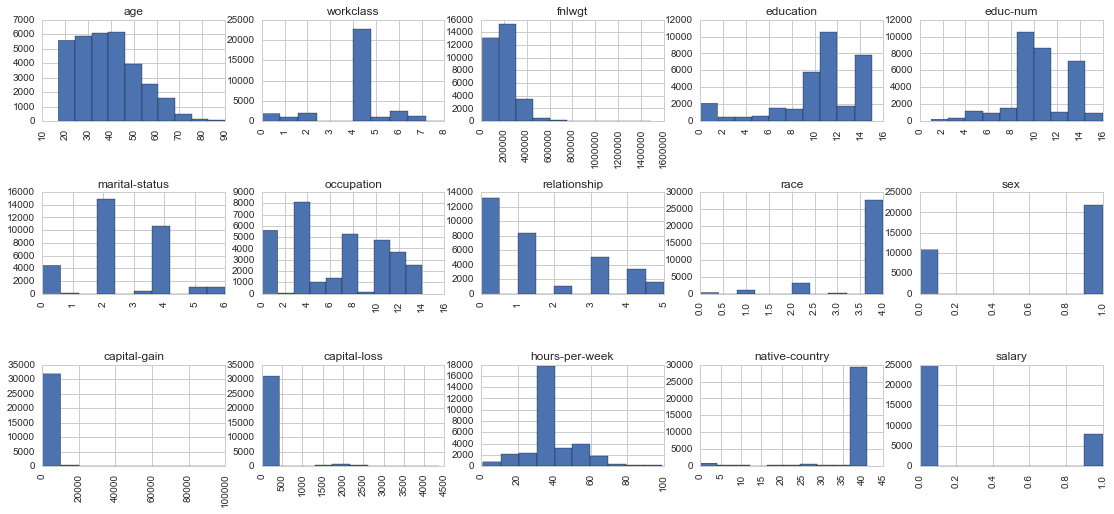

In [64]:
fig = plt.figure(figsize=(19,8))
cols = 5
rows = ceil(float(encoded_data.shape[1]) / cols)
for i, column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

### Построим матрицу корреляций

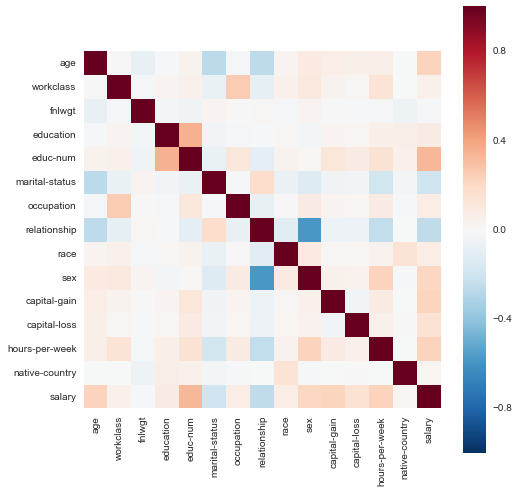

In [65]:
plt.subplots(figsize=(8,8))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

### Поделим выборку на train/test

In [67]:
X, y = binary_data[binary_data.columns[:-2]].values, binary_data['salary_ >50K'].values

X_train, y_tain = X[:10000], y[:10000]
X_test, y_test = X[10000:], y[10000:]

### Тренируем 2 классификаторва 
- умный LinearSVC
- глупый -- DummyClassifier (самый популярный класс)

In [68]:
clf_nn = svm.LinearSVC().fit(X_train, y_tain)
clf_mp = dummy.DummyClassifier("most_frequent").fit(X_train, y_tain)

In [69]:
y_nn = clf_nn.predict(X_test)
y_mp = clf_mp.predict(X_test)

In [70]:
y_nn

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [71]:
y_mp

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [72]:
y_test

array([ 0.,  0.,  1., ...,  0.,  0.,  1.])

### Accuracy

### $$Accuracy = \frac{\sum_{x_i, y_i \in (X, Y)} I(y(x_i) = y_i)}{|(X, Y)|} = \frac{num~right~classified~obj}{num~all~obj}$$

In [74]:
print 'svm =', metrics.accuracy_score(y_test, y_nn), 'mp =', metrics.accuracy_score(y_test, y_mp)

svm = 0.763840255308 mp = 0.757900802269


### Conf-matrix

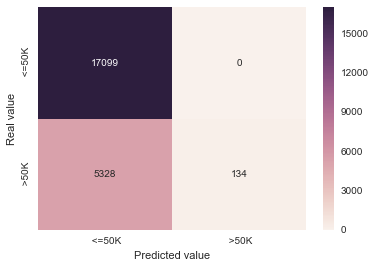

In [75]:
nn_mtx = metrics.confusion_matrix(y_test, y_nn)

sns.heatmap(nn_mtx, annot=True, fmt="d", 
            xticklabels=encoders["salary"].classes_, 
            yticklabels=encoders["salary"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

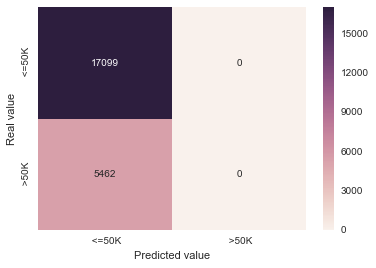

In [76]:
mp_mtx = metrics.confusion_matrix(y_test, y_mp)

sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=encoders["salary"].classes_, 
            yticklabels=encoders["salary"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

### Precision

### $$Precision = \frac{TP}{TP + FP}$$

In [77]:
print 'svm =', metrics.precision_score(y_test, y_nn), 'mp =', metrics.accuracy_score(y_test, y_mp)

svm = 1.0 mp = 0.757900802269


Приведите пример работы классификатора когда precition большой а классификатор работает плохо?

### Recall

### $$Recall = \frac{TP}{TP + FN}$$

In [78]:
print 'svm =', metrics.recall_score(y_test, y_nn), 'mp =', metrics.recall_score(y_test, y_mp)

svm = 0.0245331380447 mp = 0.0


Приведите пример работы классификатора когда recall большой а классификатор работает плохо?

### F1

Что важнее, точность или полнота? Какое среднее выбрать?

### $$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$

- Среднее арифметичиское плохо -- (p=0.5, r=0.5) сильно лучше чем (p=1, r=0), 
- Лучше минимум, но при равной точности должен побеждать классфикатор с большей полнотой
- Гармоничиское среднее, сглаженный минимум

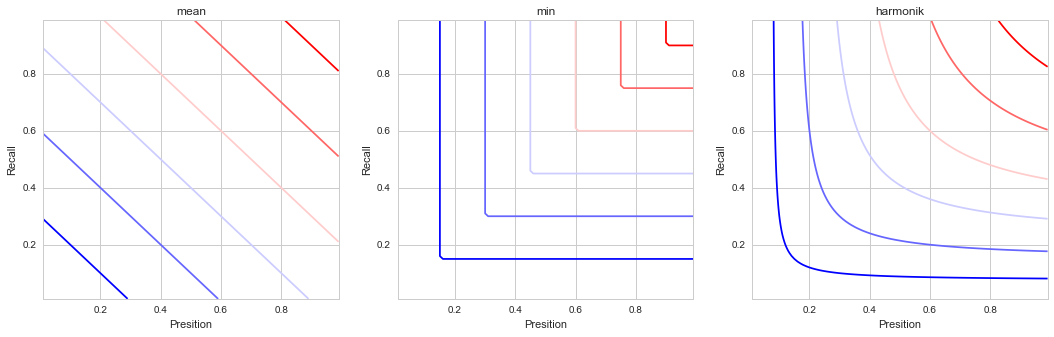

In [80]:

fig, axs = plt.subplots(figsize=(18, 5), ncols=3)

x_, y_ = np.arange(0.01, 1, 0.01), np.arange(0.01, 1, 0.01)
X, Y = np.meshgrid(x_, y_)

Z = [[0.5*x + 0.5*y  for x in x_] for y in y_]
axs[0].contour(X, Y, Z)
axs[0].set_title('mean')
axs[0].set_xlabel('Presition')
axs[0].set_ylabel('Recall')

Z = [[min(x, y)  for x in x_] for y in y_]
axs[1].contour(X, Y, Z)
axs[1].set_title('min')
axs[1].set_xlabel('Presition')
axs[1].set_ylabel('Recall')


Z = [[scipy.stats.hmean([x, y])  for x in x_] for y in y_]
axs[2].contour(X, Y, Z)
axs[2].set_title('harmonik')
axs[2].set_xlabel('Presition')
axs[2].set_ylabel('Recall')

pylab.show()

In [81]:
print 'knn =', metrics.f1_score(y_test, y_nn), 'mp =', metrics.f1_score(y_test, y_mp)

knn = 0.047891350965 mp = 0.0


### Multiclass Precision-Recall

#### Загрузим датасет с тремя классами

In [82]:
df_iris = sns.load_dataset("iris")
df_iris = df_iris.sample(n=150)

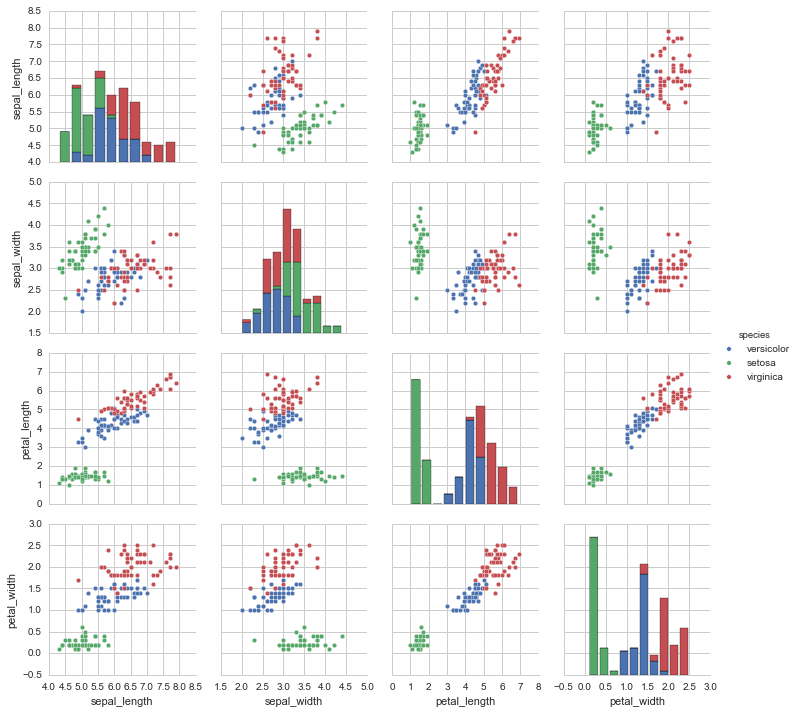

In [83]:
sns.pairplot(df_iris, hue="species")

In [84]:
df_iris, encoders = number_encode_features(df_iris)
iris_X, iris_y = df_iris[df_iris.columns[:-1]].values, df_iris[df_iris.columns[-1]].values

iris_X_train, iris_y_tain = iris_X[:30], iris_y[:30]
iris_X_test, iris_y_test = iris_X[40:], iris_y[40:]

In [86]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
54,6.5,2.8,4.6,1.5,1
49,5.0,3.3,1.4,0.2,0
122,7.7,2.8,6.7,2.0,2
6,4.6,3.4,1.4,0.3,0
148,6.2,3.4,5.4,2.3,2


In [87]:
iris_clf_nn = svm.LinearSVC().fit(iris_X_train, iris_y_tain)
iris_clf_mp = dummy.DummyClassifier("most_frequent").fit(iris_X_train, iris_y_tain)

In [88]:
iris_y_nn = iris_clf_nn.predict(iris_X_test)
iris_y_mp = iris_clf_mp.predict(iris_X_test)

Пусть выборка состоит из K классов. Рассмотрим K двухклассовых задач, каждая из которых заключается в отделении своего класса от остальных, то есть целевые значения для k-й задаче вычисляются как $y_{ik} = [yi = k]$. Для каждой из них можно вычислить различные характеристики (TP, FP, и т.д.) алгоритма $a_k(x) = [a(x) = k]$.

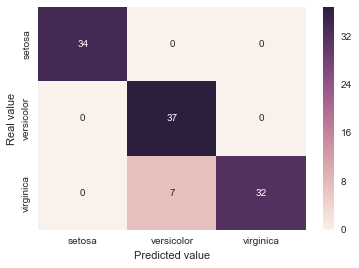

In [90]:
mp_mtx = metrics.confusion_matrix(iris_y_test, iris_y_nn)

sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=encoders["species"].classes_, 
            yticklabels=encoders["species"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

**Macro-averaging** -- подсчет TP, FN, TN, FP для каждого класса, а после подсчет точности и полноты.

**Micro-averaging** -- подсчет  точности и полноты для каждого класса, а после подсчет их среденего.

In [91]:
print 'macro', metrics.f1_score(iris_y_test, iris_y_nn, average='macro')
print 'micro', metrics.f1_score(iris_y_test, iris_y_nn, average='micro')
iris_y_nn[iris_y_nn==1] = 0
print 'macro', metrics.f1_score(iris_y_test, iris_y_nn, average='macro')
print 'micro', metrics.f1_score(iris_y_test, iris_y_nn, average='micro')

macro 0.938329565873
micro 0.936363636364
macro 0.502850435949
micro 0.6


### AUC-ROC

In [92]:
clf_nn = neighbors.KNeighborsRegressor().fit(X_train, y_tain)
clf_mp = neighbors.KNeighborsRegressor(n_neighbors=2).fit(X_train, y_tain)

In [93]:
y_nn = clf_nn.predict(X_test)
y_mp = clf_mp.predict(X_test)

ROC AUC = 0.6337


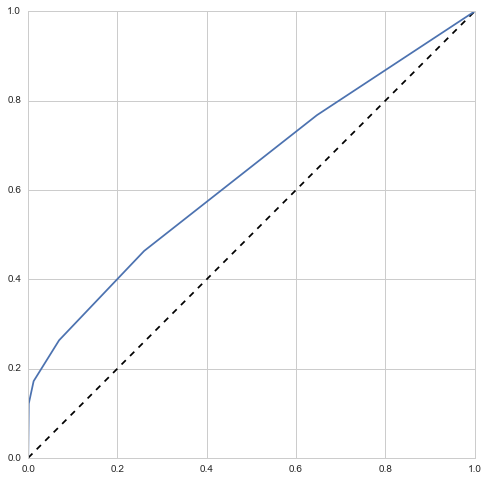

In [94]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_nn)
pylab.figure(figsize=(8, 8))
pylab.plot([0, 1], [0, 1], 'k--')
pylab.plot(fpr, tpr)
print 'ROC AUC = {0:.4f}'.format(metrics.auc(fpr, tpr))

ROC AUC = 0.6304


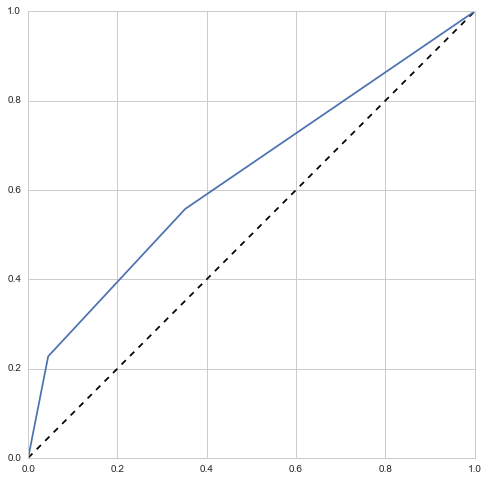

In [95]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_mp)
pylab.figure(figsize=(8, 8))
pylab.plot([0, 1], [0, 1], 'k--')
pylab.plot(fpr, tpr)
print 'ROC AUC = {0:.4f}'.format(metrics.auc(fpr, tpr))

### PR AUC

Когда AUC большой при плохой работе классивфикатора?

PR AUC = 0.2333


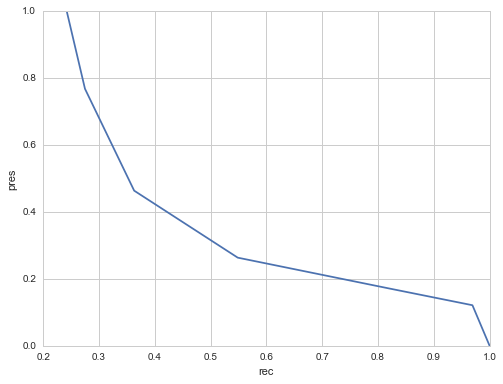

In [101]:
pres, rec, _ = metrics.precision_recall_curve(y_test, y_nn)
pylab.figure(figsize=(8, 6))
pylab.plot(pres, rec)
pylab.ylabel('pres')
pylab.xlabel('rec')
print 'PR AUC = {0:.4f}'.format(metrics.auc(pres, rec))

In [105]:
pres, rec

(array([ 0.2420992 ,  0.33612982,  0.61864407,  1.        ]),
 array([ 1.        ,  0.5574881 ,  0.22720615,  0.        ]))

PR AUC = 0.2274


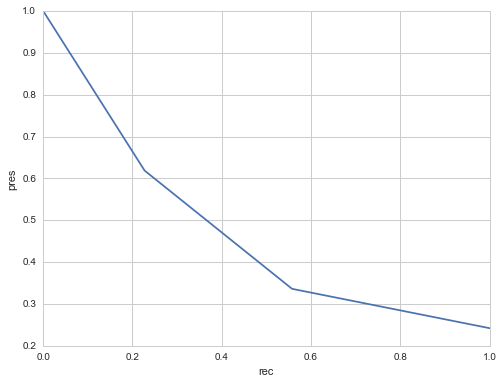

In [104]:
pres, rec, _ = metrics.precision_recall_curve(y_test, y_mp)
pylab.figure(figsize=(8, 6))
pylab.plot(rec, pres)
pylab.ylabel('pres')
pylab.xlabel('rec')
print 'PR AUC = {0:.4f}'.format(metrics.auc(pres, rec))

Когда PR кривая не адекватна?

## HW4
See <a href='https://github.com/ml-mipt/ml-mipt-part1/blob/master/2017/home_work/hw4/hw4.pdf'>Home work 4</a>

<h1 align="center">Заключение</h1>  

** Обратная связь ** 
  * оцените <a href="https://docs.google.com/forms/d/e/1FAIpQLSdmyY3f-lwrhSGeqJPaxcXrdj0SfZzZbgRIggg-nx4EQ_eQLQ/viewform?c=0&w=1"> семинар </a>
  * оставьте <a href="https://docs.google.com/forms/d/e/1FAIpQLSdefy8neFtoxDlXD3toHi3fWB3OW-23APTRj-GuTX8wtAJahQ/viewform?c=0&w=1"> отзыв </a> о лекции